# A Comprehensive Guide to Handle Missing Values Effectively

It's not often that we get clean data, real world data is very messy. In fact, missing values are one of the most cases that data scientist and machine learning engineers are likely to deal with day to day, and honestly it takes time to come up with the strategy to remove such missing values effectively.

Though we have tools that make the technical side easier, we often end up not checking how the filled values or dropped values fit with the existing data and the target goals of the analysis. Not checking this can leave us communicating wrong information, or spending time doing hyperparameter tuning and model selection thinking that the data is fine, so it must be something else, and end up tuning the parameters weeks and weeks.

Having said that, in this tutorial we will discover the common ways that data scientists and machine learning engineers use to handle missing values and we will see the best practices as we conclude the post. We will use california housing, a classic dataset in Machine learning.

In [1]:
# importing libraries
import pandas as pd
import numpy as np

`urllib.request` is an extensible library for opening URLs.

This module defines functions and classes which help in opening URLs (mostly HTTP) in a complex world — basic and digest authentication, redirections, cookies and more.

In [2]:
import urllib.request

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):

    """
     Function to retrive data from the data paths
     And to read the data as a pandas dataframe

    To return the dataframe
    """

      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)

    return data

In [3]:
housing = download_read_data(data_path)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Data Dictionary**

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. ocean_proximity: Location of the house w.r.t ocean/sea

In [4]:
housing.shape

(20640, 10)

In [5]:
# retrieving the info gives us the non-null count of each variable
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# more efficient way for mv detection
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

It seems that we only have missing values in total_bedrooms.

Now we know the feature with missing values, let's do some analysis around it and then go through the techniques to handle the feature, but also trying to understand the process.

## Exploratory Data Analysis

<Axes: xlabel='total_bedrooms', ylabel='total_rooms'>

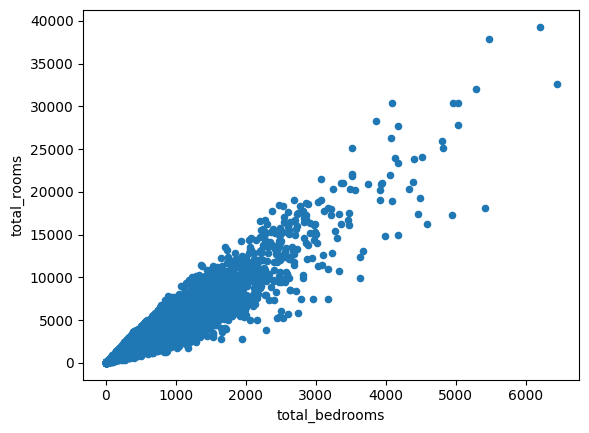

In [10]:
housing.plot(x='total_bedrooms', y='total_rooms', kind='scatter')

The total bedrooms correlate with total rooms which make sense because the bedrooms are counted in total rooms.

In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
grouped_df = housing.groupby('ocean_proximity')['total_bedrooms'].mean()
grouped_df

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

<Axes: xlabel='ocean_proximity'>

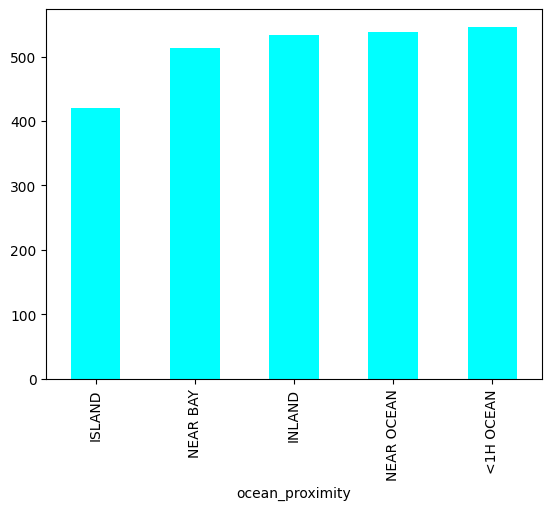

In [16]:
grouped_df.sort_values().plot(kind='bar', color='cyan')

The average total bderooms for a specific block tends to be high when the proximity of the property is nearby ocean, or less than 1 hour to the nearest beach or dock, or when it is inland

<Axes: ylabel='Frequency'>

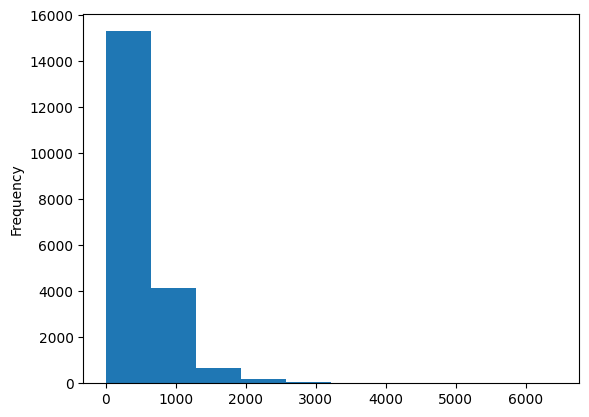

In [9]:
housing['total_bedrooms'].plot(kind='hist')

You can see that within a particular block, most houses have total bedrooms between 0 to 1000.

## Handling Missing Values

There are number of methods to handle missing values, you can opt for one of these but keep in mind that each can affect our analysis:
    
    *Removing the missing values
    *Filling the missing values
    *Leaving the missing values as it is.
    
    
Starting from the first one, if you were to remove the missing values, fairly simple. You can do the following, and you are done.

### Removing the missing values

In [17]:
housing_df = housing.copy()

In [18]:
housin_null_dropped = housing.dropna()

In [19]:
housin_null_dropped.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Now, you're done. However, you may also remove the missing values by a condition. In this case, you can do the following.

In [20]:
housin_null_dropped_2 = housing.dropna(axis='columns')

In [21]:
housin_null_dropped_2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

As you can see, total_bedroom is removed. This is can however lead to the loss of data that could be meaningful despite that it contains NaNs.

If you want more control, then you can use 'threshold' to specify how many non missing values (minimum) to keep for a given column or row.

In [22]:
housin_null_dropped_2 = housing.dropna(axis='columns', thresh=2)

In [23]:
housin_null_dropped_2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Another Interesting thing here to try is to remove the rows or columns that are empty. This can save you time if you have hundreds of columns or rows that you want to remove specifically. When how is set to 'all', you are basically saying remove all columns which are all null.

**All the missing value dropping that we have seen so far by setting the axis='columns' may be applied to rows as well.**

In [24]:
housin_null_dropped_3 = housing.dropna(axis='columns', how='all')

### Filling the missing values

With pandas, filling the missing values is quite straight. Here is how you can fill any missing value with a number.

In [25]:
housing_filled = housing.fillna(3)

In [26]:
housing_filled.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

You could also use the `ffill` (forward fill) or `bfill` (backward fill), where you fill the missing values with those preceding or succeeding the former.

In [27]:
housing_filled = housing.fillna(method='ffill') #method='bfill' for backward

This is detrimental for our analysis though. Let's take an example.

In [29]:
sample = housing_filled[housing_filled['total_bedrooms']>housing_filled['total_rooms']]
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
696,-122.10,37.69,41.0,746.0,789.0,387.0,161.0,3.9063,178400.0,NEAR BAY
2826,-119.11,35.42,52.0,154.0,522.0,37.0,16.0,10.0263,200000.0,INLAND
9877,-121.85,36.61,38.0,238.0,717.0,191.0,67.0,1.3897,125000.0,<1H OCEAN
13925,-114.59,34.83,41.0,812.0,1283.0,375.0,158.0,1.7083,48500.0,INLAND
14930,-117.02,32.66,19.0,771.0,1368.0,376.0,108.0,6.6272,273600.0,NEAR OCEAN
15118,-116.95,32.84,31.0,1307.0,2506.0,752.0,231.0,3.4286,129400.0,<1H OCEAN
15607,-116.66,32.79,13.0,843.0,847.0,918.0,152.0,6.2152,240600.0,<1H OCEAN
19391,-120.85,37.78,25.0,421.0,659.0,303.0,106.0,2.2679,71300.0,INLAND


Downside about this is that if the first value would be a missing value, then the rest are same.

Also, see what happened at the index **2826**.

Properties with total of 154 rooms has a total 522 bedrooms, which is impossible.

The methods introduced above may potentially lead to serious bias and/or wrong results, resulting in wrong decisions.   

Let's also look at other ways you can use to fill the missing values. Say we want to fill all missing values by mean or median of a given column.

In such cases, we will use sklearn imputer method.

In [30]:
from sklearn.impute import SimpleImputer

housing_numeric = housing.drop('ocean_proximity', axis=1) #Simple imputer only work with numeric features, so we drop the feature OCEAN_PROXIMITY
mean_fill = SimpleImputer(missing_values=np.NaN, strategy='mean')
mean_fill.fit(housing_numeric)

SimpleImputer()

In [31]:
mean_filled = mean_fill.transform(housing_numeric)

In [33]:
mean_filled_df = pd.DataFrame(mean_filled, columns=housing_numeric.columns)
mean_filled_df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


But this method also brings forth issues.

You will find that the number of bedrooms are greater than the number of rooms in a house which is again impossible and can lead to wrong analysis.

In [34]:
sample = mean_filled_df[mean_filled_df['total_bedrooms']>mean_filled_df['total_rooms']]
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2826,-119.11,35.42,52.0,154.0,537.870553,37.0,16.0,10.0263,200000.0
7168,-118.17,34.06,43.0,464.0,537.870553,416.0,120.0,2.4750,142600.0
8915,-118.46,34.03,52.0,523.0,537.870553,317.0,130.0,2.2794,337500.0
9877,-121.85,36.61,38.0,238.0,537.870553,191.0,67.0,1.3897,125000.0
9942,-122.23,38.17,45.0,350.0,537.870553,225.0,72.0,1.8942,216700.0
13597,-117.28,34.09,44.0,376.0,537.870553,273.0,107.0,2.2917,90800.0
14307,-117.14,32.71,52.0,500.0,537.870553,480.0,108.0,1.8696,91100.0
19391,-120.85,37.78,25.0,421.0,537.870553,303.0,106.0,2.2679,71300.0
19607,-121.02,37.48,26.0,467.0,537.870553,244.0,83.0,4.1346,187500.0
20069,-120.37,38.01,30.0,473.0,537.870553,242.0,93.0,2.5417,123200.0


## The problem is how do you deal with the missing value effectively? Do you remove them? Or are there other more efficient ways to handle it?

If you have few missing values, no doubt that it would be good to remove them completely to avoid imputing them with irrelevant values - **Quality over quantity**

But also you may wish to keep the data and perhaps find a better way to handle the missing values. One of the best way out there (considering all the flaws of the above methods) is to fill the given missing value considering the values of corresponding features. In this case, we will use sklearn method called Iterative Imputer or Regression Imputer. This works on the principle of Linear regression.

- Multivariate imputer that estimates each feature from all the others.
- A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

You can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer)

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer()
iter_imputer

IterativeImputer()

In [36]:
housing_imputed = iter_imputer.fit_transform(housing_numeric)

In [37]:
housing_imputed_df = pd.DataFrame(housing_imputed, columns=housing_numeric.columns)
housing_imputed_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [38]:
sample = mean_filled_df[housing_imputed_df['total_bedrooms']>housing_imputed_df['total_rooms']]
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


As you can see, the missing values are filled in accordance to the other features.

For instance, houses in a block with total rooms as 1467 have total bedrooms as 190, and those with 1274 rooms have 235 bedrooms.

Note that for each missing value to be estimated, every corresponding feature is considered.

In [39]:
## end of notebook